# Singular Value Decomposition

Singular Value Decompostion (SVD) is a technique in linear algebra. It can we can decompose any rectangular matix into three matrices as:

$$A = USV^T$$

Wher $U$ is an orthogonal metrix of singular vetctors. $S$ is a matrix of singular vlaues. $V$ is a matrix of right singular vecotor. The singular value decompositon is a method to seperate out the corelated arguments that makes up the matrix. For example a data set used as a training set for a machine learning algorithm consisits of many corelated data components. If we want to analyse them, we can use SVD to seperate out corelated compoents. And then we use PCA (Principal Component Analysis) to pick up the compoents which best respresents the data. 

PCA is a statstical method to reduce dimenssionsility. PCA is to transform the data in the new varible such the the variance of the data is the most. The component of the data which has the most variance is called the principal compoent, the second most variance is called second principal components. 

SVD and PCA is an important algorithm. It has many usage like image compression, solving set of linear equation, and solving diffrential equaiton. In the contaxt of Machine Learning it helps in feature selection and dimenssionality reduction. For example a Machine learning model can identify many many feature but not all of them are useful and its very computationally expensive, so we need to cut down some features and select only those feature which are important for us. This is made possible my SVD and PCA. 

The method to obtain the SVD from the matrix is following:

- Obtain the matrix $G$ as $G = A^T A$
- Calculate the eignvalues and eigenvectors of $G$. 
- The matrix $V$ is the orthonormalised matrix of eignvectors as columns. 
- The matrix $S$ is obtain as taken as square root of the eigen values as diagonal entries.
- The matrix $U$ is obtained as following:
- $$U_i = \frac{1}{\sigma_i}V.A$$ 
- Where $\sigma_i$ is the eigen value vector. 



In [9]:
import numpy as np
import scipy.linalg
import cv2 as c
import matplotlib.pyplot as plt

In [2]:
#defining gram schmdict orthonormalisation process 
def gram_schmdit(mat):
    n = len(mat)
    orthmat = np.zeros((n,n))

    #making them orthogonal by substracting the projection
    for i in range(0,n):
        x = mat[:,i]
        for j in range(i):
            v = orthmat[:,j]
            x -= ((x@v)/(v@v))*v #x-(x.v)/(v.v)*v

        orthmat[:,i]  = x #setting them up into the orthorn

    #normalising the vectors
    for i in range(n):
        vi = orthmat[:,i] #selecting the column vector
        norm = np.sqrt(vi@vi) #calculating the norm
        vi /= norm #dividing by the norm to normalise

    return orthmat #returning the normalised matrix

In [3]:
def svd(A):
    G = A.T@A #making the G matrix
    eval, evac = np.linalg.eigh(G) #calcuting the eigenvalus
    eval  = eval.round(5)

    #sorting the eigen values and eigen vactors in accending order
    idx = eval.argsort()[::-1]
    eval = eval[idx]
    evac = evac[:,idx]

    #S matrix is the square root of the eign values as diagonal entries
    sigma = np.sqrt(eval)

    #V matrix is obtained by orthonormalising the eigen vector
    V = gram_schmdit(evac)

    #U matrix we have to take more care
    U = np.zeros(((A.shape[0]),A.shape[0]))

    for i in range(A.shape[0]):
        U[:,i] = (A@V[:,i])/sigma[i]

    #making the S matrix from the sigma matrix
    S = np.zeros_like(A)
    for i in range(A.shape[0]):
        S[i,i] = sigma[i]
    
    return U, S, V

In [4]:
A = np.array([[1,2,3],[4,5,6]], dtype='float64')
U, S, V = svd(A)
print(U@S@V.T)
print(A)

[[1. 2. 3.]
 [4. 5. 6.]]
[[1. 2. 3.]
 [4. 5. 6.]]


In [5]:
#calculating the same tihng from built in fucntion
U, sigma, V = scipy.linalg.svd(A)
S = np.zeros_like(A, dtype='float64')
for i in range(A.shape[0]):
    S[i,i] = sigma[i]

V = V.T #the built in function gives the transpose of our standard notation

In [6]:
print(U@S@V.T)

[[1. 2. 3.]
 [4. 5. 6.]]


## Practical implication of SVD: Image Compression

In [10]:
#reading the greysacle value of the image in a matrix
image = c.imread("pexels-simona-kidrič-2607544.jpg", c.IMREAD_GRAYSCALE)
print("done loading image")

#computing the SVD 
U, S, V= scipy.linalg.svd(image)
print("done taking SVD")

s = np.zeros(shape=image.shape)

k = 10000 #THIS IS A THRESHOLD, if the eigen values are less than that we will desgard it

#for recosctruction
for i in range(len(s)-1):
    if S[i]>k:
        s[i,i] = S[i]
print("done compressing")

redimage = U@s@V
print("done reconstrucinng")

done loading image
done taking SVD
done compressing
done reconstrucinng


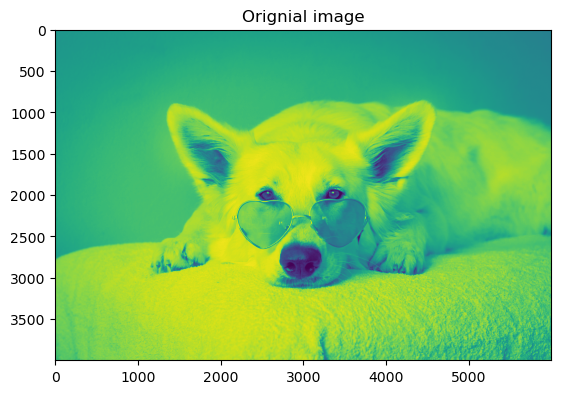

In [17]:
plt.imshow(image)
plt.title("Orignial image")
plt.show()

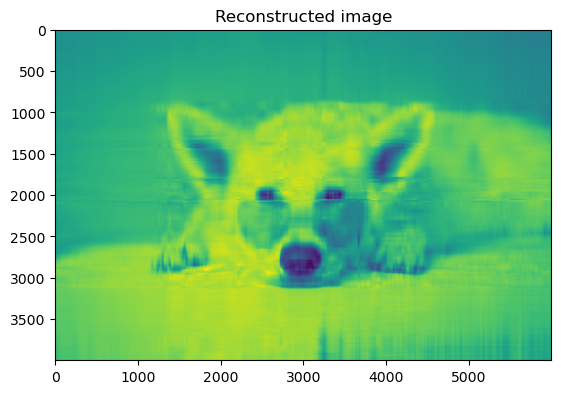

In [18]:
plt.imshow(redimage)
plt.title("Reconstructed image")
plt.show()